In [6]:
import numpy as np
from qutip import *
import functions_fbq
from functions_fbq import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [24]:
Ec = 40e9
El = 0.4e9
EDelta = 20e9
r = 0.05
phi_ext = 0

In [43]:
El_list = np.logspace(np.log10(0.01e9),np.log10(50e9),100)
evals_list = np.zeros((len(El_list),4), dtype=complex)
ekets_list = []
matrix_op_sqr_list = np.zeros((len(El_list),3))

for i,El in enumerate(tqdm(El_list)):
    evals,ekets,matrix_op_sqr = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = 4)
    evals_list[i,:] = evals
    ekets_list.append(ekets)
    matrix_op_sqr_list[i,:] = np.abs(matrix_op_sqr)

100%|██████████| 100/100 [00:38<00:00,  2.61it/s]


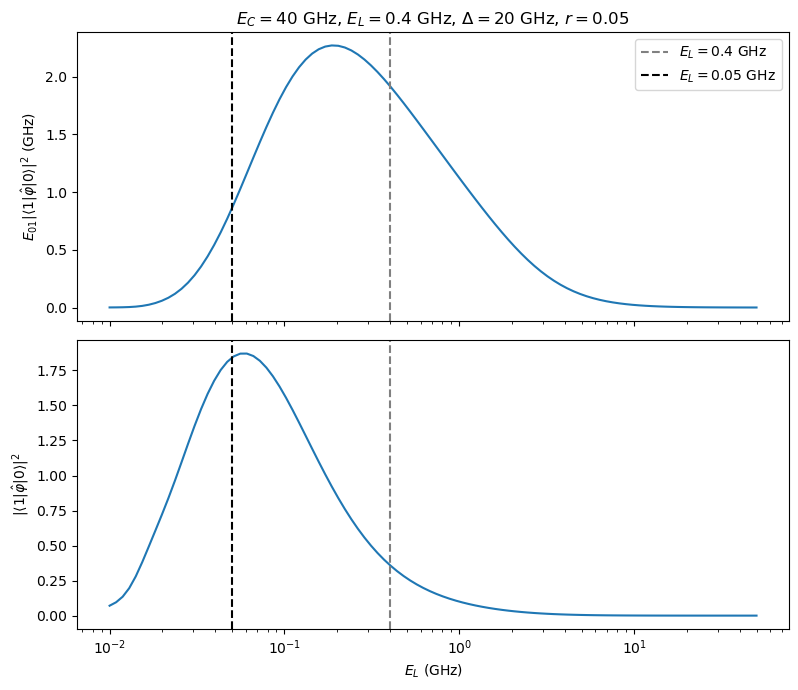

In [49]:
fig, ax = plt.subplots(2,1,figsize=(8,7), sharex=True)
ax[0].plot(El_list*1e-9, matrix_op_sqr_list[:,1]**2*np.abs((evals_list[:,1] - evals_list[:,0]))*1e-9)
ax[0].set_ylabel(r'$E_{01} |\langle 1 | \hat{\varphi} | 0 \rangle|^2$ (GHz)')
ax[1].plot(El_list*1e-9, matrix_op_sqr_list[:,1]**2)
ax[1].set_ylabel(r'$|\langle 1 | \hat{\varphi} | 0 \rangle|^2$')
# draw a line at El = 0.4 GHz
ax[0].axvline(0.4, color='gray', linestyle='--', label = r'$E_L = 0.4$ GHz')
ax[0].axvline(0.05, color='k', linestyle='--', label = r'$E_L = 0.05$ GHz')
ax[1].axvline(0.4, color='gray', linestyle='--', label = r'$E_L = 0.4$ GHz')
ax[1].axvline(0.05, color='k', linestyle='--', label = r'$E_L = 0.05$ GHz')
ax[1].set_xlabel(r'$E_L$ (GHz)')
ax[0].set_xscale('log')
ax[0].set_title(r'$E_C = 40$ GHz, $E_L = 0.4$ GHz, $\Delta = 20$ GHz, $r = 0.05$')
ax[0].legend()
plt.tight_layout()
plt.show()
